In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import datetime

%matplotlib inline

In [2]:
path_to_file = 'transaction_data.csv'

In [5]:
transaction_df = pd.read_csv(path_to_file)

In [13]:
transaction_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [8]:
transaction_df.shape


(5315, 3)

In [22]:
transaction_df = transaction_df.astype({'name':'string', 'transaction':'string'})
transaction_df['date'] = pd.to_datetime(transaction_df['date'])
transaction_df.dtypes

date           datetime64[ns]
name                   string
transaction            string
dtype: object

In [25]:
transaction_df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [30]:
transaction_categories = transaction_df\
    .groupby('transaction', as_index=False)\
    .agg({'name':'count'})\
    .sort_values(by='name')\
    .rename(columns={'name':'count_categories_transaction'})

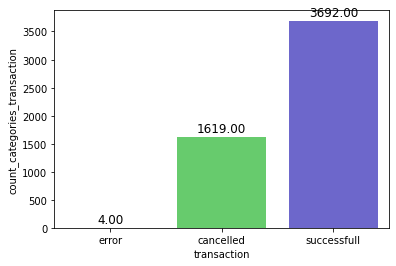

In [44]:
ax = sns.barplot(data=transaction_categories, x='transaction', y='count_categories_transaction', palette='hls', errwidth=0)
for bar in ax.patches:
   ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
# Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

# Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, 
# совершённых каждым пользователем, где

# по оси x – число транзакций
# по оси y – доля пользователей с таким числом транзакций

In [49]:
transaction_secc_peopl = transaction_df\
    .query("transaction == 'successfull'")\
    .groupby('name', as_index=False)\
    .agg({'date':'count'})
transaction_secc_peopl['date'].describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: date, dtype: float64

In [54]:
transaction_secc_peopl['date'].median()

64.0

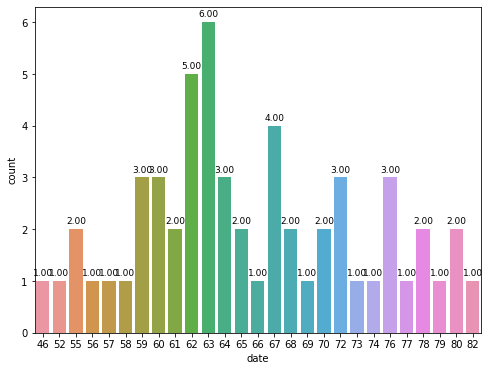

In [56]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=transaction_secc_peopl, x="date")
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
# Постройте сводную таблицу user_vs_minute_pivot, где:

# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций
# Пропущенные значения заполните нулями.

# Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

# Новые данные сохранены в df.

In [57]:
transaction_df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [60]:
transaction_df['time_minute'] = transaction_df.date.dt.minute
transaction_df.head()

,date,name,transaction,time_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [68]:
user_vs_minute_pivot = transaction_df\
    .groupby(['name', 'time_minute'], as_index=False)\
    .agg({'date':'count'})\
    .pivot(index='time_minute', columns='name', values='date')\
    .fillna(0)

In [64]:
# посчитайте число минут, прошедших с начала дня. 
# Результат сохраните в колонку true_minute. 
# Постройте график, как в предыдущем шаге, 
# и посмотрите, произошли ли изменения (график в код включать не нужно).

In [80]:
transaction_df['true_minute'] = transaction_df.date.dt.hour * 60 + transaction_df.date.dt.minute

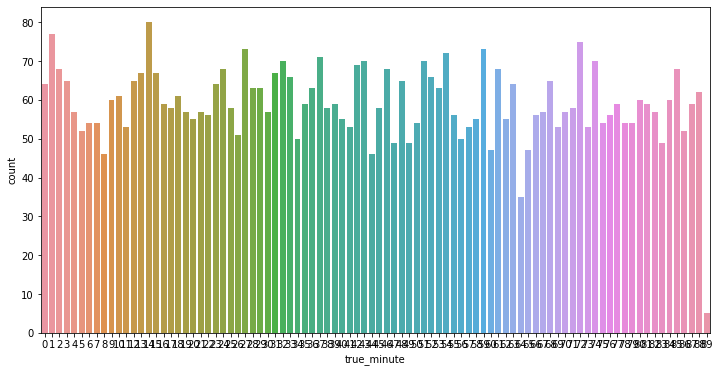

In [83]:
plt.figure(figsize=[12,6])
sns.countplot(data = transaction_df, x='true_minute')